<a href="https://colab.research.google.com/github/DATA3750/WeeklyDemo/blob/main/Wk8_PowerBIwPython_TitanicExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/Dong2Yo/Dataset/main/titanic.csv")

# Let's take a look at the first few rows of the dataset
print(dataset.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**DATA Prep**

In [ ]:
import pandas as pd

# Drop irrelevant columns
dataset.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Fill missing values in Age column with median age
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

# Fill missing values in Embarked column with the most common value
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

# Convert Sex and Embarked to categorical variables
dataset['Sex'] = dataset['Sex'].astype('category')
dataset['Embarked'] = dataset['Embarked'].astype('category')

# Create dummy variables for categorical columns
dataset = pd.get_dummies(dataset, columns=['Sex', 'Embarked'], drop_first=True)

# Normalize the Fare column
dataset['Fare'] = (dataset['Fare'] - dataset['Fare'].min()) / (dataset['Fare'].max() - dataset['Fare'].min())

# Save the preprocessed data to a new CSV file
#dataset.to_csv("titanic_preprocessed.csv", index=False)



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

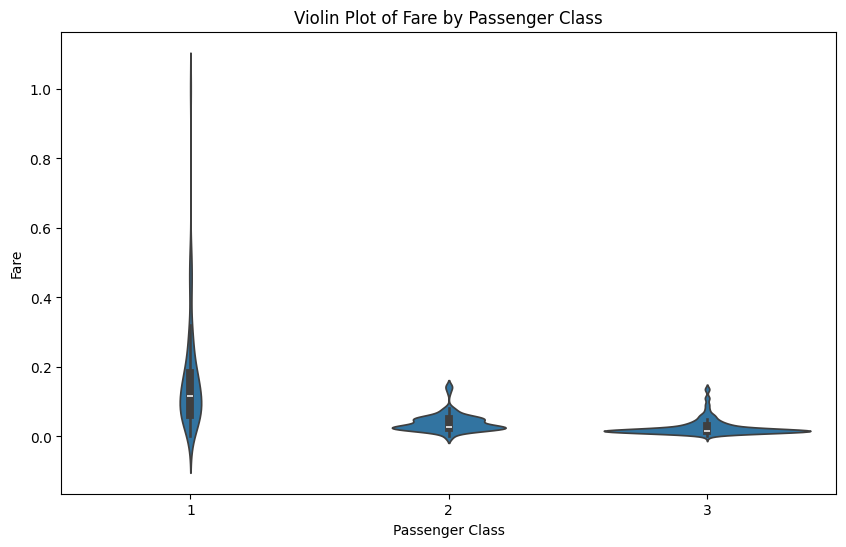

In [ ]:
# Create a violin plot for the Fare column
plt.figure(figsize=(10, 6))
sns.violinplot(x=dataset['Pclass'], y=dataset['Fare'])
plt.title('Violin Plot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 24.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 27.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


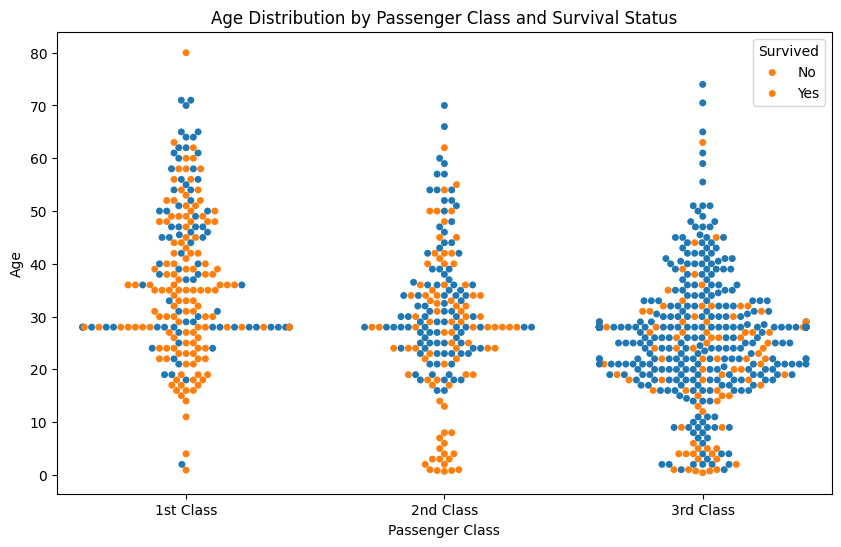

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a swarm plot for age by survival status and passenger class
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Pclass', y='Age', hue='Survived', data=dataset)
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


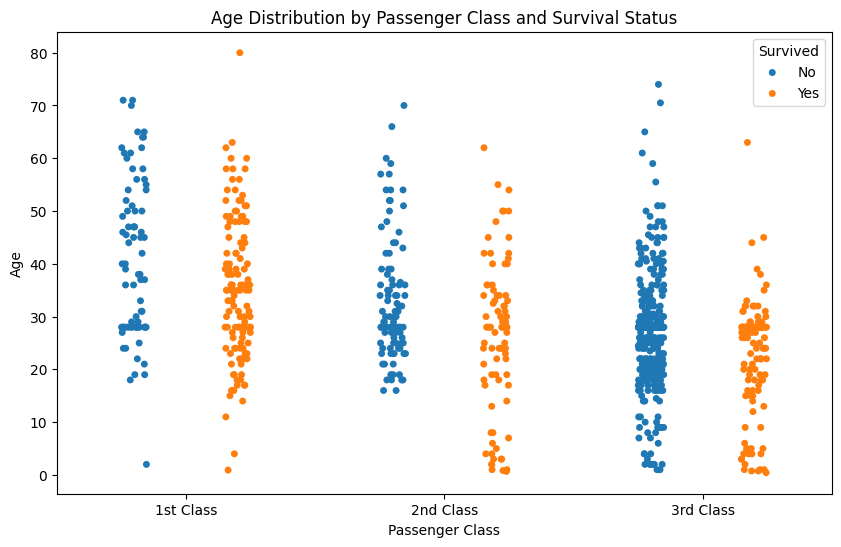

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a strip plot for age by survival status and passenger class
plt.figure(figsize=(10, 6))
sns.stripplot(x='Pclass', y='Age', hue='Survived', data=dataset, dodge=True)
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


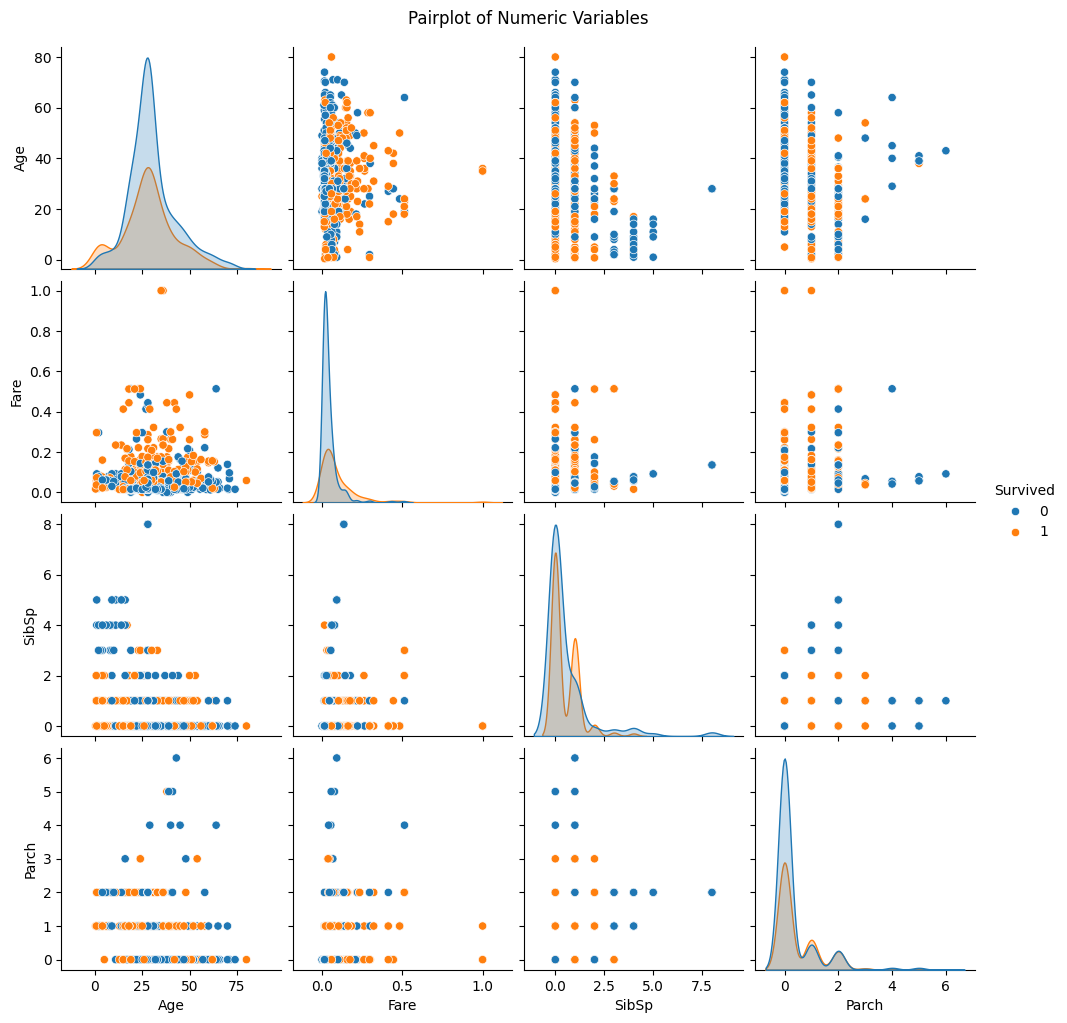

In [ ]:
# Create a pairplot of numeric variables
sns.pairplot(dataset[['Age', 'Fare', 'SibSp', 'Parch', 'Survived']], hue='Survived')
plt.suptitle('Pairplot of Numeric Variables', y=1.02)
plt.show()


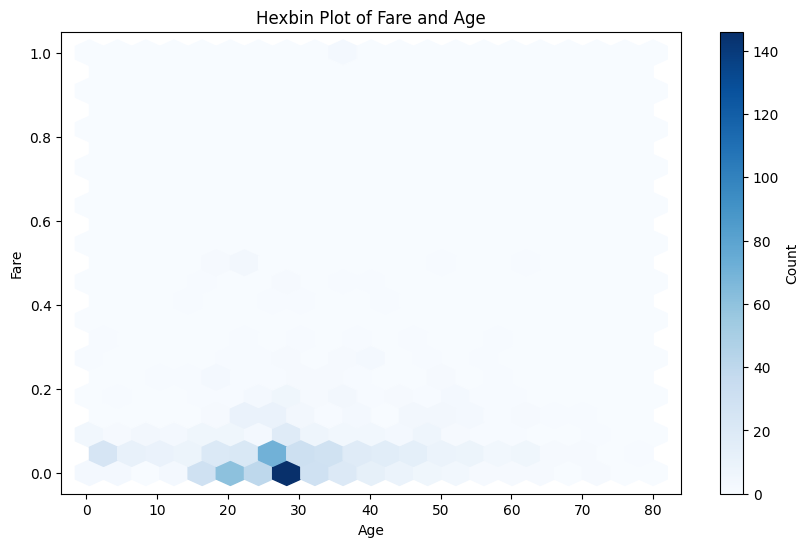

In [ ]:
# Create a hexbin plot of fare and age
plt.figure(figsize=(10, 6))
plt.hexbin(x='Age', y='Fare', gridsize=20, cmap='Blues', data=dataset)
plt.colorbar(label='Count')
plt.title('Hexbin Plot of Fare and Age')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


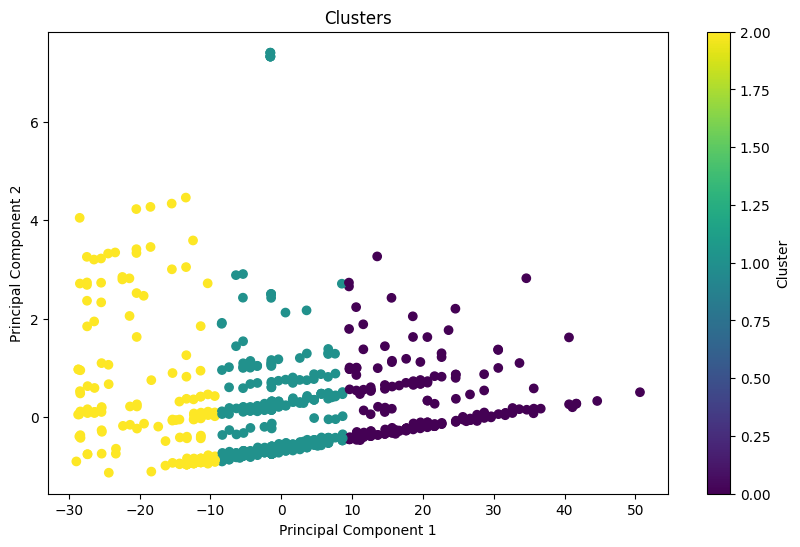

In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Applying K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(dataset)

# Adding cluster labels to the dataset
dataset['Cluster'] = kmeans.labels_

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(dataset.drop('Cluster', axis=1))

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
